In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl
import tensorflow as tf
import os
import time
import random
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

print("Numpy version = ", np.__version__)
print("Tensorflow version = ", tf.__version__)
print("Sklearn version = ", skl.__version__)
print("Pandas version = ", pd.__version__)
print("Python version = ", __import__("platform").python_version())

warnings.filterwarnings('ignore')

Numpy version =  1.22.4
Tensorflow version =  2.9.1
Sklearn version =  1.1.1
Pandas version =  1.4.2
Python version =  3.8.13


In [2]:
def print_frequency(y_train,y_test,kind='Validation'):
    unique, counts = np.unique(y_train, return_counts=True)
    uniquet, countst = np.unique(y_test, return_counts=True)

    fig, ax = plt.subplots()
    rects1 = ax.bar(unique - 0.2, counts, 0.25, label='Treinamento')
    rects2 = ax.bar(unique + 0.2, countst, 0.25, label=kind)
    ax.legend()
    ax.set_xticks(unique)
    ax.set_xticklabels(labels)

    plt.title('Dataset Fashion MNIST')
    plt.xlabel('Clase')
    plt.ylabel('Frequência')
    plt.savefig('frequency.png')
    plt.show()

def create_confusion_matrix (y_val, y_predict, score, vmax, model):
    cm = skl.metrics.confusion_matrix(y_val, y_predict)

    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt='d', linewidths=.5, square = True, cmap = 'Blues_r',vmin=0,vmax=vmax);
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = model+'\n\nAccuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


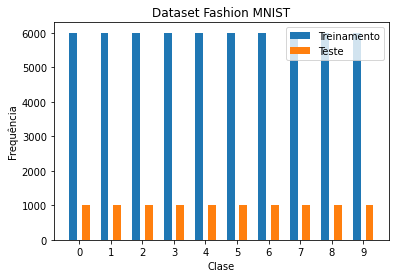

In [19]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

sprite = {
        0: 'T-shirt',
        1: 'Trouser',
        2: 'Pullover',
        3: 'Dress',
        4: 'Coat',
        5: 'Sandal',
        6: 'Shirt',
        7: 'Sneaker',
        8: 'Bag',
        9: 'Ankle boot'
    }

labels = ["%s" % i for i in range(10)]

print_frequency(y_train,y_test,kind='Teste')


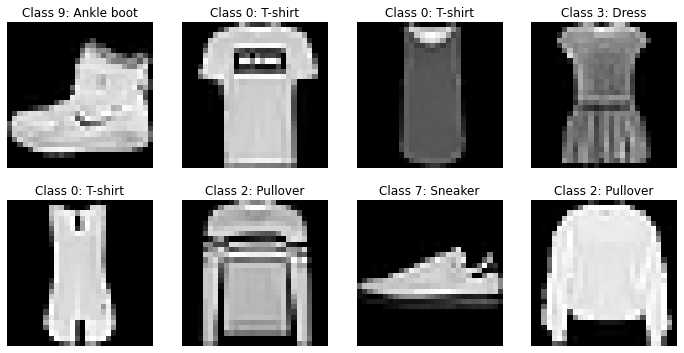

(60000, 28, 28)


In [20]:
fig, ax = plt.subplots(2, 4, figsize = (12, 6))

for i in range(8):
    ax[i//4, i%4].imshow(x_train[i], cmap='gray')
    ax[i//4, i%4].axis('off')
    ax[i//4, i%4].set_title("Class %d: %s" 
                            %(y_train[i],sprite[y_train[i]]))
    
plt.show()

print(x_train.shape)


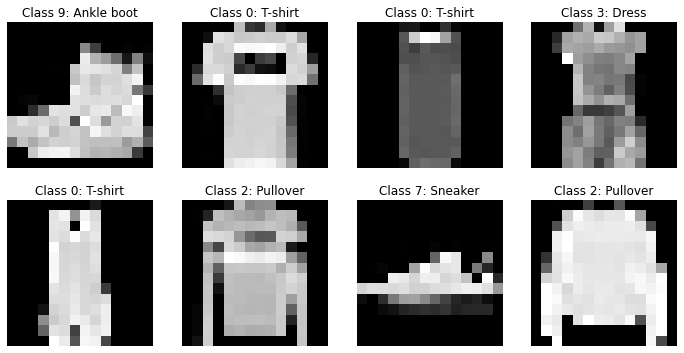

In [21]:
# Reduce the image size to its half 
x_train = np.array([img[::2, 1::2] for img in x_train])
x_test  = np.array([img[::2, 1::2] for img in x_test])

# Print the image with new size
fig, ax = plt.subplots(2, 4, figsize = (12, 6))

for i in range(8):
    ax[i//4, i%4].imshow(x_train_reduced[i], cmap='gray')
    ax[i//4, i%4].axis('off')
    ax[i//4, i%4].set_title("Class %d: %s" 
                            %(y_train[i],sprite[y_train[i]]))
    
plt.show()

In [23]:
# x_train = (x_train/255.0).astype('float32').reshape((60000,28*28))
# x_test = (x_test/255.0).astype('float32').reshape((10000,28*28))

x_train = (x_train/255.0).astype('float32').reshape((60000,14*14))
x_test = (x_test/255.0).astype('float32').reshape((10000,14*14))

print(x_train.dtype)
print(x_test.dtype)

print("\nShape of X_train: ", x_train.shape)
print("Shape of X_test: ", x_test.shape)

print("\nMinimum value in X_train:", np.amin(x_train))
print("Maximum value in X_train:", np.amax(x_train))

print("\nMinimum value in X_test:", np.amin(x_test))
print("Maximum value in X_test:", np.amax(x_test))

float32
float32

Shape of X_train:  (60000, 196)
Shape of X_test:  (10000, 196)

Minimum value in X_train: 0.0
Maximum value in X_train: 1.0

Minimum value in X_test: 0.0
Maximum value in X_test: 1.0


## 1. Dataset preparation

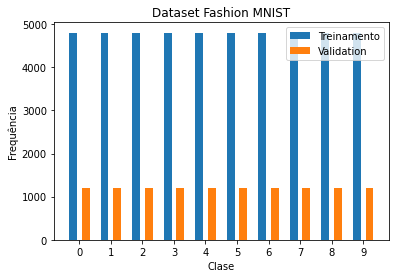

Shape of X_train:   (60000, 196)
Shape of y_train:   (60000,)
Shape of x_Dtrain:   (48000, 196)
Shape of y_Dtrain:  (48000,)
Shape of D_val:     (12000, 196)
Shape of y_Dval:    (12000,)
Proportion of classes in y_train:   [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]

Proportion of classes in y_Dtrain:  [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]

Differences in proportions of classes in y_train and y_Dtrain:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Sum of proportions in y_train =  0.9999999999999999


In [24]:
N, d = x_train.shape
index = np.arange(N)

x_Dtrain,D_val,y_Dtrain,y_Dval,index_Dtrain,index_Dval = \
train_test_split(x_train,y_train,index,train_size=0.80,random_state=4,stratify=y_train)

print_frequency(y_Dtrain,y_Dval)

print("Shape of X_train:  ", x_train.shape)
print("Shape of y_train:  ", y_train.shape)
print("Shape of x_Dtrain:  ", x_Dtrain.shape)
print("Shape of y_Dtrain: ", y_Dtrain.shape)
print("Shape of D_val:    ", D_val.shape)
print("Shape of y_Dval:   ", y_Dval.shape)

u, c_y_train = np.unique(y_train, return_counts=True)
u, c_y_dtrain = np.unique(y_Dtrain, return_counts=True)
print("Proportion of classes in y_train:  ", c_y_train[0:10]/len(y_train))
print()
print("Proportion of classes in y_Dtrain: ", c_y_dtrain[0:10]/len(y_Dtrain))
print()
print("Differences in proportions of classes in y_train and y_Dtrain: ", 
      np.abs(c_y_train[0:10]/len(y_train) - c_y_dtrain[0:10]/len(y_Dtrain)))
print()
print("Sum of proportions in y_train = ", sum(c_y_train[0:10]/len(y_train)))

## 2. Choosing a baseline

### 2.1. Logistic Regression

In [25]:
# #Logistic Regression

model_lgreg = LogisticRegression()
solvers_lgreg = ['newton-cg','lbfgs']
c_values_lgreg = [10.0, 5.0, 1.0, 0.1, 0.01] 
grid_lgreg = dict(solver=solvers_lgreg,C=c_values_lgreg,random_state=[4])

time_lgreg = time.time()
grid_search_lgreg = GridSearchCV(estimator=model_lgreg, param_grid=grid_lgreg, scoring='accuracy',verbose=3, 
            cv=skl.model_selection.StratifiedKFold(n_splits=2,random_state=4,shuffle=True).split(x_Dtrain,y_Dtrain))
grid_result_lgreg = grid_search_lgreg.fit(x_Dtrain, y_Dtrain) 

time_lgreg = time.time() - time_lgreg

pd.DataFrame(grid_result_lgreg.cv_results_)[['params','rank_test_score','mean_test_score']].sort_values(by=['rank_test_score'])

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 1/2] END C=10.0, random_state=4, solver=newton-cg;, score=0.823 total time=  16.5s
[CV 2/2] END C=10.0, random_state=4, solver=newton-cg;, score=0.822 total time=  16.1s
[CV 1/2] END C=10.0, random_state=4, solver=lbfgs;, score=0.823 total time=   1.9s
[CV 2/2] END C=10.0, random_state=4, solver=lbfgs;, score=0.822 total time=   1.9s
[CV 1/2] END C=5.0, random_state=4, solver=newton-cg;, score=0.824 total time=  10.8s
[CV 2/2] END C=5.0, random_state=4, solver=newton-cg;, score=0.823 total time=  11.8s
[CV 1/2] END C=5.0, random_state=4, solver=lbfgs;, score=0.823 total time=   2.3s
[CV 2/2] END C=5.0, random_state=4, solver=lbfgs;, score=0.822 total time=   2.2s
[CV 1/2] END C=1.0, random_state=4, solver=newton-cg;, score=0.824 total time=   6.5s
[CV 2/2] END C=1.0, random_state=4, solver=newton-cg;, score=0.824 total time=   6.8s
[CV 1/2] END C=1.0, random_state=4, solver=lbfgs;, score=0.824 total time=   2.1s
[CV 2/2] 

,params,rank_test_score,mean_test_score
4,"{'C': 1.0, 'random_state': 4, 'solver': 'newto...",1,0.824229
5,"{'C': 1.0, 'random_state': 4, 'solver': 'lbfgs'}",2,0.823396
2,"{'C': 5.0, 'random_state': 4, 'solver': 'newto...",3,0.823000
1,"{'C': 10.0, 'random_state': 4, 'solver': 'lbfgs'}",4,0.822896
0,"{'C': 10.0, 'random_state': 4, 'solver': 'newt...",5,0.822667
3,"{'C': 5.0, 'random_state': 4, 'solver': 'lbfgs'}",6,0.822646
7,"{'C': 0.1, 'random_state': 4, 'solver': 'lbfgs'}",7,0.821354
6,"{'C': 0.1, 'random_state': 4, 'solver': 'newto...",8,0.821292
8,"{'C': 0.01, 'random_state': 4, 'solver': 'newt...",9,0.799354
9,"{'C': 0.01, 'random_state': 4, 'solver': 'lbfgs'}",10,0.799208


In [26]:
#SVM

model_SVM = SVC()
kernel_SVM = ['linear','rbf']
c_values_SVM = [10.0, 5.0, 1.0, 0.1, 0.01] 
grid_SVM = dict(kernel=kernel_SVM,C=c_values_SVM,random_state=[4])

time_SVM = time.time()
grid_search_SVM = GridSearchCV(estimator=model_SVM, param_grid=grid_SVM, scoring='accuracy',verbose=3, 
            cv=skl.model_selection.StratifiedKFold(n_splits=2,random_state=4,shuffle=True).split(x_Dtrain,y_Dtrain))
grid_result_SVM = grid_search_SVM.fit(x_Dtrain, y_Dtrain) 

time_SVM = time.time() - time_SVM


pd.DataFrame(grid_result_SVM.cv_results_)[['params','rank_test_score','mean_test_score']].sort_values(by=['rank_test_score'])

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 1/2] END C=10.0, kernel=linear, random_state=4;, score=0.827 total time=  41.1s
[CV 2/2] END C=10.0, kernel=linear, random_state=4;, score=0.825 total time=  40.7s
[CV 1/2] END C=10.0, kernel=rbf, random_state=4;, score=0.875 total time=  51.0s
[CV 2/2] END C=10.0, kernel=rbf, random_state=4;, score=0.874 total time=  49.1s
[CV 1/2] END C=5.0, kernel=linear, random_state=4;, score=0.829 total time=  33.7s
[CV 2/2] END C=5.0, kernel=linear, random_state=4;, score=0.827 total time=  34.4s
[CV 1/2] END .C=5.0, kernel=rbf, random_state=4;, score=0.874 total time=  51.2s
[CV 2/2] END .C=5.0, kernel=rbf, random_state=4;, score=0.872 total time=  50.6s
[CV 1/2] END C=1.0, kernel=linear, random_state=4;, score=0.833 total time=  27.4s
[CV 2/2] END C=1.0, kernel=linear, random_state=4;, score=0.831 total time=  28.3s
[CV 1/2] END .C=1.0, kernel=rbf, random_state=4;, score=0.861 total time=  55.5s
[CV 2/2] END .C=1.0, kernel=rbf, r

,params,rank_test_score,mean_test_score
1,"{'C': 10.0, 'kernel': 'rbf', 'random_state': 4}",1,0.874375
3,"{'C': 5.0, 'kernel': 'rbf', 'random_state': 4}",2,0.872771
5,"{'C': 1.0, 'kernel': 'rbf', 'random_state': 4}",3,0.858938
6,"{'C': 0.1, 'kernel': 'linear', 'random_state': 4}",4,0.833417
4,"{'C': 1.0, 'kernel': 'linear', 'random_state': 4}",5,0.831771
2,"{'C': 5.0, 'kernel': 'linear', 'random_state': 4}",6,0.827937
0,"{'C': 10.0, 'kernel': 'linear', 'random_state'...",7,0.825896
7,"{'C': 0.1, 'kernel': 'rbf', 'random_state': 4}",8,0.812896
8,"{'C': 0.01, 'kernel': 'linear', 'random_state'...",9,0.811542
9,"{'C': 0.01, 'kernel': 'rbf', 'random_state': 4}",10,0.742833
